Target:
* Add dropout regularization with a probability of 10% after each layer (except the final layer) to reduce overfitting

Result:
* Max Train accuracy (in 15 epochs): 98.75%.
* Max test accuracy (in 15 epochs): 99.14%

Analysis:
*  The dropout has reduced the accuracy of both train and test which is expected. However the test accuracy is generally higher than train accuracy.
* I need to boost my trainset by adding data transformations and augmentations. I will include image rotation in the next iteration to try and improve train accuracy

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

Cloning into 'ERA_V1'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 222 (delta 107), reused 127 (delta 42), pack-reused 0
Receiving objects: 100% (222/222), 3.65 MiB | 26.51 MiB/s, done.
Resolving deltas: 100% (107/107), done.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [2]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_5_Net, model_summary, model_train, model_test

Allocate GPU

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_5_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]             900
      BatchNorm2d-10           [-1, 10, 22, 22]              20
             ReLU-11           [-1, 10, 22, 22]               0
          Dropout-12           [-1, 10, 22, 22]               0
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14             [-1, 1

Define Transforms

In [4]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [5]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 236484959.33it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 117951016.38it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 164343220.30it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22652233.97it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Define train and test loaders

In [6]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

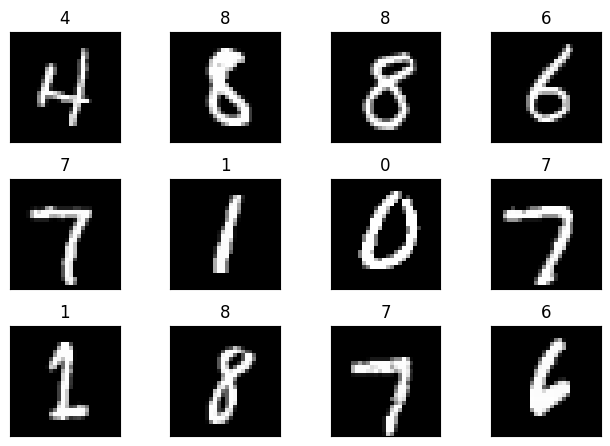

In [7]:
preview_batch_images(train_loader)

In [8]:
model = Model_5_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)


epoch: 1


loss=0.2813858389854431 batch_id=468 Accuracy = 89.54: 100%|██████████| 469/469 [00:22<00:00, 20.58it/s]



Test set: Average loss: 0.1434, Accuracy: 9744/10000 (97.44%)

epoch: 2


loss=0.20049799978733063 batch_id=468 Accuracy = 96.97: 100%|██████████| 469/469 [00:17<00:00, 26.31it/s]



Test set: Average loss: 0.0853, Accuracy: 9820/10000 (98.20%)

epoch: 3


loss=0.042323917150497437 batch_id=468 Accuracy = 97.61: 100%|██████████| 469/469 [00:19<00:00, 24.51it/s]



Test set: Average loss: 0.0694, Accuracy: 9826/10000 (98.26%)

epoch: 4


loss=0.06576553732156754 batch_id=468 Accuracy = 97.97: 100%|██████████| 469/469 [00:17<00:00, 27.35it/s]



Test set: Average loss: 0.0568, Accuracy: 9862/10000 (98.62%)

epoch: 5


loss=0.08579368144273758 batch_id=468 Accuracy = 98.15: 100%|██████████| 469/469 [00:18<00:00, 25.75it/s]



Test set: Average loss: 0.0523, Accuracy: 9877/10000 (98.77%)

epoch: 6


loss=0.07928033173084259 batch_id=468 Accuracy = 98.31: 100%|██████████| 469/469 [00:17<00:00, 27.35it/s]



Test set: Average loss: 0.0506, Accuracy: 9864/10000 (98.64%)

epoch: 7


loss=0.05954061076045036 batch_id=468 Accuracy = 98.43: 100%|██████████| 469/469 [00:17<00:00, 26.22it/s]



Test set: Average loss: 0.0440, Accuracy: 9885/10000 (98.85%)

epoch: 8


loss=0.07388541847467422 batch_id=468 Accuracy = 98.44: 100%|██████████| 469/469 [00:16<00:00, 27.64it/s]



Test set: Average loss: 0.0428, Accuracy: 9876/10000 (98.76%)

epoch: 9


loss=0.11962229758501053 batch_id=468 Accuracy = 98.63: 100%|██████████| 469/469 [00:17<00:00, 26.59it/s]



Test set: Average loss: 0.0386, Accuracy: 9894/10000 (98.94%)

epoch: 10


loss=0.06466536968946457 batch_id=468 Accuracy = 98.61: 100%|██████████| 469/469 [00:17<00:00, 27.17it/s]



Test set: Average loss: 0.0378, Accuracy: 9898/10000 (98.98%)

epoch: 11


loss=0.07394319772720337 batch_id=468 Accuracy = 98.61: 100%|██████████| 469/469 [00:17<00:00, 27.21it/s]



Test set: Average loss: 0.0366, Accuracy: 9899/10000 (98.99%)

epoch: 12


loss=0.031942665576934814 batch_id=468 Accuracy = 98.75: 100%|██████████| 469/469 [00:19<00:00, 23.60it/s]



Test set: Average loss: 0.0344, Accuracy: 9908/10000 (99.08%)

epoch: 13


loss=0.03801810368895531 batch_id=468 Accuracy = 98.73: 100%|██████████| 469/469 [00:17<00:00, 26.17it/s]



Test set: Average loss: 0.0364, Accuracy: 9898/10000 (98.98%)

epoch: 14


loss=0.05829428508877754 batch_id=468 Accuracy = 98.84: 100%|██████████| 469/469 [00:18<00:00, 25.20it/s]



Test set: Average loss: 0.0323, Accuracy: 9914/10000 (99.14%)

epoch: 15


loss=0.03235388919711113 batch_id=468 Accuracy = 98.84: 100%|██████████| 469/469 [00:17<00:00, 26.40it/s]



Test set: Average loss: 0.0275, Accuracy: 9928/10000 (99.28%)

epoch: 16


loss=0.04436329007148743 batch_id=468 Accuracy = 98.89: 100%|██████████| 469/469 [00:17<00:00, 26.49it/s]



Test set: Average loss: 0.0286, Accuracy: 9920/10000 (99.20%)

epoch: 17


loss=0.007817769423127174 batch_id=468 Accuracy = 98.84: 100%|██████████| 469/469 [00:18<00:00, 24.96it/s]



Test set: Average loss: 0.0324, Accuracy: 9907/10000 (99.07%)

epoch: 18


loss=0.04908730462193489 batch_id=468 Accuracy = 98.90: 100%|██████████| 469/469 [00:17<00:00, 26.28it/s]



Test set: Average loss: 0.0323, Accuracy: 9901/10000 (99.01%)

epoch: 19


loss=0.07532761245965958 batch_id=468 Accuracy = 98.92: 100%|██████████| 469/469 [00:19<00:00, 24.56it/s]



Test set: Average loss: 0.0303, Accuracy: 9917/10000 (99.17%)



Plot Statistics

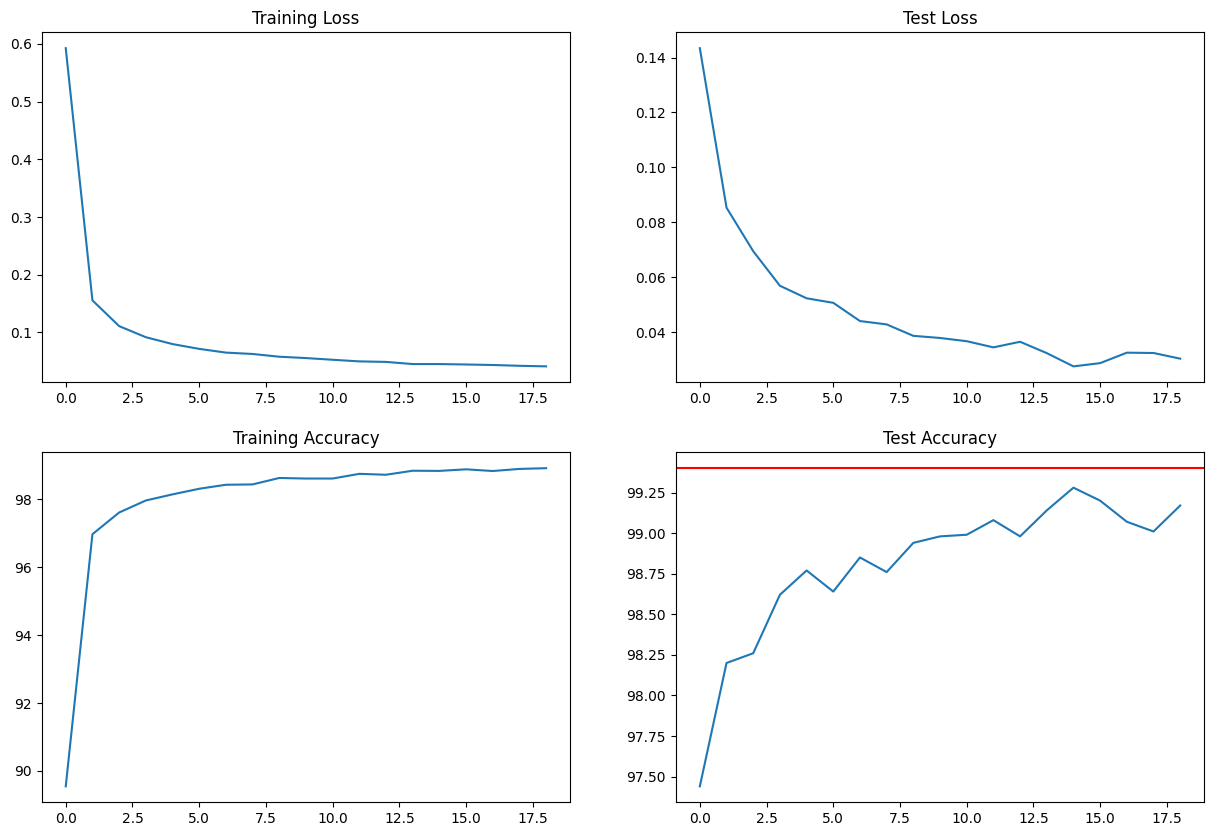

In [9]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)